# Retornos Discretos e Contínuos: Cálculo, Comparação e Aplicações

O crescimento do capital ao longo do tempo pode ser modelado de duas formas principais:

- **Retorno discreto:** o rendimento é capitalizado em intervalos definidos (mensais, semestrais, anuais).  
- **Retorno contínuo:** o crescimento ocorre de forma ininterrupta, como se o capital rendesse infinitamente em pequenos intervalos de tempo.

A diferença entre essas abordagens é sutil, mas essencial:
- No regime discreto, a taxa é aplicada periodicamente sobre o saldo acumulado.  
- No regime contínuo, o crescimento é exponencial puro, modelado pela função $e^{(r*t)}$.

Matematicamente:
$$
\begin{align*}
r_d &= \left( \frac{FV}{IV} \right)^{\frac{1}{n}} - 1 \\
r_c &= \ln \left( \frac{FV}{IV} \right)
\end{align*}
$$
onde:
- $r_d$ = taxa discreta,
- $r_c$ = taxa contínua,
- $FV$ = valor futuro,
- $IV$ = valor inicial,
- $n$ = número de períodos.

O notebook a seguir mostra como calcular, converter e visualizar essas taxas de retorno em diferentes contextos financeiros.


## Código e Documentação das Funções

# 1. Método Simples

In [ ]:
import numpy as np

def compute_nominal_rate(FV, IV, compounding_periods):
    """
    Calcula a taxa nominal anual equivalente sob regime de capitalização discreta.

    Parâmetros:
        FV (float): Valor futuro do investimento.
        IV (float): Valor inicial investido.
        compounding_periods (int): Número de capitalizações por ano (ex: 12 = mensal).

    Retorna:
        float: Taxa nominal anualizada.

    Exemplo:
        >>> compute_nominal_rate(1100, 1000, 12)
        0.1047  # (10,47%)
    """
    rate_per_period = (FV / IV) ** (1 / compounding_periods) - 1
    nominal_rate = rate_per_period * compounding_periods
    return nominal_rate

def compute_continuous_return(FV, IV):
    """
    Calcula o retorno sob capitalização contínua (logarítmico).

    Parâmetros:
        FV (float): Valor futuro.
        IV (float): Valor inicial.

    Retorna:
        float: Taxa de retorno contínua.

    Observação:
        Este tipo de taxa é amplamente usado em finanças quantitativas,
        precificação de derivativos e modelos de crescimento exponencial.
    """
    return np.log(FV / IV)

In [3]:
# Inputs
FV = 1100
IV = 1000
frequencies = {
1: "Annual",
2: "Semiannual",
12: "Monthly"}

for m, label in frequencies.items():
    r = compute_nominal_rate(FV, IV, m)
    print(f"{label:<10}: {r:.2%}")

Annual    : 10.00%
Semiannual: 9.76%
Monthly   : 9.57%


In [4]:
# Example usage
r_cont = compute_continuous_return(1100, 1000)
print(f"Continuous return: {r_cont:.2%}")

Continuous return: 9.53%


# 2. Método mais Completo

In [ ]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

class InterestCalculator:
    """
    Classe de apoio para cálculos e comparações entre retornos discretos e contínuos.

    Funcionalidades:
        - Conversão entre taxas nominais, periódicas e contínuas.
        - Cálculo de valor futuro (FV) e valor inicial (IV).
        - Cálculo de taxas equivalentes com base em datas reais.
        - Geração de relatórios e gráficos comparativos de crescimento.

    Aplicações:
        - Avaliar investimentos com diferentes frequências de capitalização.
        - Comparar produtos financeiros em regimes distintos.
        - Ilustrar a convergência do regime discreto para o contínuo.
    """

    @staticmethod
    def compute_nominal_rate(FV, IV, compounding_periods):
        """
        Calcula a taxa nominal anual equivalente, a partir do valor futuro (FV), valor inicial (IV) e da quantidade de períodos de capitalização ao ano.
        
        Este método permite entender, por exemplo, qual seria a “taxa ao ano” correspondente a um investimento que rende determinada porcentagem ao mês ou ao trimestre.

        Parâmetros:
        - FV: Valor Futuro do investimento ou dívida.
        - IV: Valor Inicial aplicado ou tomado.
        - compoundingperiods: Número de períodos de capitalização dentro do ano (ex: 12 para mensal, 6 para bimestral).
        
        Retorno:
        - Taxa nominal anual (float), proporcional à quantidade de períodos especificada.
        """

        rate_per_period = (FV / IV) ** (1 / compounding_periods) - 1
        nominal_rate = rate_per_period * compounding_periods
        return nominal_rate

    @staticmethod
    def compute_continuous_return(FV, IV):
        """
        Determina a taxa de juro composta de forma contínua, baseada nos valores inicial (IV) e futuro (FV).

        Útil para converter rentabilidades apresentadas de forma nominal/anuais em taxas referentes a capitalização contínua.

        Parâmetros:
        - FV: Valor Futuro projetado.
        - IV: Valor Inicial do investimento.

        Retorno:
        - Taxa anual equivalente sob regime de capitalização contínua.
        """
        return np.log(FV / IV)

    @staticmethod
    def nominal_to_continuous(nominal_rate, compounding_periods):
        rate_per_period = nominal_rate / compounding_periods
        continuous_rate = compounding_periods * np.log(1 + rate_per_period)
        return continuous_rate

    @staticmethod
    def continuous_to_nominal(continuous_rate, compounding_periods):
        nominal_rate = compounding_periods * (np.exp(continuous_rate / compounding_periods) - 1)
        return nominal_rate

    @staticmethod
    def compute_rates_from_dates(FV, IV, start_date, end_date, compounding_periods=12):
        """
        Calcula taxas (por período, nominal anual, e contínua) usando datas reais de início e fim,
        considerando capitalizações regulares no período informado.

        Aplica as fórmulas para extrair taxas compatíveis entre regimes de capitalização e retorna fração exata do ano
        usada para cálculo — fundamental para simulações de prazos personalizados.

        Parâmetros:
        - FV: Valor Futuro (final do período).
        - IV: Valor Inicial (início do período).
        - startdate, enddate: Strings ou datetime indicando as datas de início e fim.
        - compoundingperiods: Número de períodos ao ano (default 12 — mensal).

        Retorno:
        - Dicionário com taxa por período, nominal anual, contínua e fração do ano considerada.
        """
        if isinstance(start_date, str):
            start_date = datetime.strptime(start_date, '%Y-%m-%d')
        if isinstance(end_date, str):
            end_date = datetime.strptime(end_date, '%Y-%m-%d')

        days_diff = (end_date - start_date).days
        year_fraction = days_diff / 365.0
        effective_periods = compounding_periods * year_fraction

        rate_per_period = (FV / IV) ** (1 / effective_periods) - 1
        nominal_rate = rate_per_period * compounding_periods
        continuous_rate = compounding_periods * np.log(1 + rate_per_period)

        return {
            'rate_per_period': rate_per_period,
            'nominal_rate': nominal_rate,
            'continuous_rate': continuous_rate,
            'year_fraction': year_fraction
        }

    @staticmethod
    def compute_FV(IV, rate, periods, continuous=False):
        if continuous:
            return IV * np.exp(rate * periods)
        else:
            return IV * (1 + rate) ** periods

    @staticmethod
    def compute_IV(FV, rate, periods, continuous=False):
        if continuous:
            return FV / np.exp(rate * periods)
        else:
            return FV / (1 + rate) ** periods

    @staticmethod
    def compute_FV_from_dates(IV, rate, start_date, end_date, compounding_periods=12, continuous=False):
        if isinstance(start_date, str):
            start_date = datetime.strptime(start_date, '%Y-%m-%d')
        if isinstance(end_date, str):
            end_date = datetime.strptime(end_date, '%Y-%m-%d')
        
        days_diff = (end_date - start_date).days
        year_fraction = days_diff / 365.0

        if continuous:
            FV = IV * np.exp(rate * year_fraction)
        else:
            periods = compounding_periods * year_fraction
            FV = IV * (1 + rate / compounding_periods) ** periods

        return FV

    @staticmethod
    def compute_IV_from_dates(FV, rate, start_date, end_date, compounding_periods=12, continuous=False):
        if isinstance(start_date, str):
            start_date = datetime.strptime(start_date, '%Y-%m-%d')
        if isinstance(end_date, str):
            end_date = datetime.strptime(end_date, '%Y-%m-%d')
        
        days_diff = (end_date - start_date).days
        year_fraction = days_diff / 365.0

        if continuous:
            IV = FV / np.exp(rate * year_fraction)
        else:
            periods = compounding_periods * year_fraction
            IV = FV / (1 + rate / compounding_periods) ** periods

        return IV
    
    @staticmethod
    def plot_nominal_vs_continuous(FV, IV, start_date, end_date, compounding_periods=12):
        """
        Gera gráfico comparativo de investimento com:
        - Taxa nominal discreta (degraus)
        - Taxa contínua equivalente (valor final coincide)
        
        Parâmetros:
        FV: valor futuro
        IV: investimento inicial
        start_date, end_date: datas (str ou datetime)
        compounding_periods: períodos por ano (ex: 12 para mensal)
        """

        # Calcula taxa nominal e taxa contínua equivalente
        rate_per_period = (FV / IV) ** (1 / compounding_periods) - 1
        nominal_rate = rate_per_period * compounding_periods
        continuous_rate_equiv = compounding_periods * np.log(1 + rate_per_period)

        # Datas intermediárias
        if isinstance(start_date, str):
            start_date = datetime.strptime(start_date, '%Y-%m-%d')
        if isinstance(end_date, str):
            end_date = datetime.strptime(end_date, '%Y-%m-%d')
        total_days = (end_date - start_date).days
        dates = [start_date + timedelta(days=i) for i in range(total_days + 1)]
        t_fraction = np.array([(d - start_date).days / 365.0 for d in dates])

        # FV nominal discreto em degraus
        FV_nominal_steps = []
        for t in t_fraction:
            completed_periods = int(t * compounding_periods)
            FV_nominal_steps.append(IV * (1 + rate_per_period) ** completed_periods)
        FV_nominal_steps = np.array(FV_nominal_steps)

        # FV contínuo equivalente
        FV_continuous = IV * np.exp(continuous_rate_equiv * t_fraction)

        # Plot
        plt.figure(figsize=(10,6))
        plt.step(dates, FV_nominal_steps, where='post', label='Nominal (degraus)', color='blue', linewidth=2)
        plt.plot(dates, FV_continuous, label='Contínua equivalente', color='green', linewidth=2)
        plt.axhline(IV, color='gray', linestyle='--', label='Investimento Inicial')
        plt.xlabel('Data')
        plt.ylabel('Valor acumulado (R$)')
        plt.title('Comparação: Taxa Nominal Discreta vs Contínua Equivalente')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Retorna as taxas para referência
        return {
            'taxa_nominal_anual': nominal_rate,
            'taxa_continua_equivalente': continuous_rate_equiv
        }

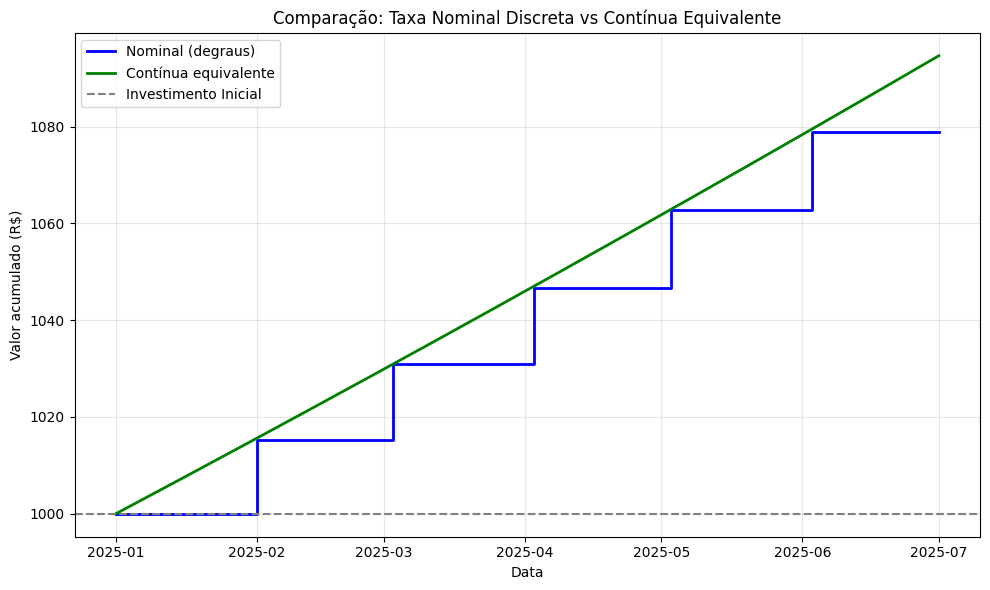


========== RELATÓRIO DE INVESTIMENTO ==========
Taxa nominal anual: 18.37%
Taxa contínua equivalente: 18.23%



In [7]:
IV = 1000
FV = 1200
start_date = '2025-01-01'
end_date = '2025-07-01'

taxas = InterestCalculator.plot_nominal_vs_continuous(FV, IV, start_date, end_date, compounding_periods=12)

print("\n========== RELATÓRIO DE INVESTIMENTO ==========")
print(f"Taxa nominal anual: {taxas['taxa_nominal_anual']*100:.2f}%")
print(f"Taxa contínua equivalente: {taxas['taxa_continua_equivalente']*100:.2f}%")
print("===============================================\n")

## Conclusão

As taxas discretas e contínuas são duas formas de representar o mesmo fenômeno: o crescimento do capital no tempo.

- O regime **discreto** é usado no cotidiano — aplicações mensais, empréstimos, CDBs, etc.
- O regime **contínuo** é teórico, mas essencial em **modelos quantitativos**, **derivativos** e **curvas de juros**.

Em aplicações práticas, entender como converter entre os dois permite comparar investimentos de forma justa e compreender a lógica por trás do crescimento exponencial do dinheiro.